In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
behavior_df = pd.read_csv("datasets/QVI_purchase_behaviour.csv")

In [3]:
transaction_df = pd.read_excel("datasets/QVI_transaction_data.xlsx")

## Examine Transaction Data

In [4]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [5]:
transaction_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [6]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [7]:
import datetime as dt

In [8]:
# convert excel style date into datetime format
transaction_df['DATE'] = pd.TimedeltaIndex(transaction_df['DATE'],unit='d') + dt.datetime(1899,12,30)

In [9]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [10]:
# check for missing data
transaction_df.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

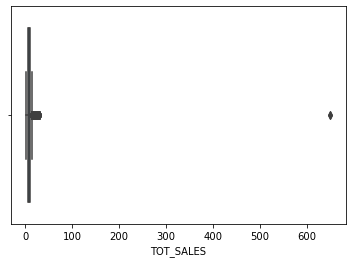

In [11]:
# check for outliers with a boxplot
sns.boxplot(x=transaction_df['TOT_SALES'])

In [12]:
from scipy import stats

In [13]:
# find outliers using z scores

# find the z scores for total_sales
z = np.abs(stats.zscore(transaction_df['TOT_SALES']))
# anything above and below 3 and -3 respectively will be classified as outliers
threshold = 3

# check how many outliers exist for the total sales column
print(len(np.where(z > 3)[0]))

# check dataframe shape (rows and columns)
print(transaction_df.shape)

# remove the outliers
transaction_df = transaction_df[(z<3)]

# check if changes are made
print(transaction_df.shape)

439
(264836, 8)
(264397, 8)


In [14]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264397 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264397 non-null  datetime64[ns]
 1   STORE_NBR       264397 non-null  int64         
 2   LYLTY_CARD_NBR  264397 non-null  int64         
 3   TXN_ID          264397 non-null  int64         
 4   PROD_NBR        264397 non-null  int64         
 5   PROD_NAME       264397 non-null  object        
 6   PROD_QTY        264397 non-null  int64         
 7   TOT_SALES       264397 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 18.2+ MB


In [15]:
# extract the 175 g from the prod_name column and place in a new column
prod_size_df = transaction_df['PROD_NAME'].str.extract("(\d+)")

# get the index number of the prod_name column 
prod_name_column_loc = transaction_df.columns.get_loc("PROD_NAME")

# insert at a specific index in the dataframe
transaction_df.insert(prod_name_column_loc+1, "PROD_SIZE", prod_size_df)

In [16]:
# check if changes are made
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,175,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,175,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,170,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,175,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,150,3,13.8


In [17]:
# change datatype for PROD_NAME
transaction_df['PROD_SIZE'] = pd.to_numeric(transaction_df['PROD_SIZE'])

In [18]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264397 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264397 non-null  datetime64[ns]
 1   STORE_NBR       264397 non-null  int64         
 2   LYLTY_CARD_NBR  264397 non-null  int64         
 3   TXN_ID          264397 non-null  int64         
 4   PROD_NBR        264397 non-null  int64         
 5   PROD_NAME       264397 non-null  object        
 6   PROD_SIZE       264397 non-null  int64         
 7   PROD_QTY        264397 non-null  int64         
 8   TOT_SALES       264397 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 20.2+ MB


In [19]:
transaction_df.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,175,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,175,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,170,2,2.9


In [20]:
import re

In [21]:
transaction_df.reset_index(drop=True,inplace=True)

In [22]:
for i in range(transaction_df.shape[0]):
    edited_text = re.sub('\d\w*',"",transaction_df['PROD_NAME'][i])
    transaction_df['PROD_NAME'][i] = edited_text

C:\Users\smartestpersonalive\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
# save a checkpoint
transactoin_checkpoint1_df = transaction_df

In [24]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,175,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,175,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,170,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,175,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,150,3,13.8


In [25]:
# drop rows that contain the word "salsa" (not chips)
# some products here are not actually chips

# set all words to lower case before finding the word "salsa"
transaction_df['PROD_NAME'] = transaction_df['PROD_NAME'].apply(lambda x: x.lower())

# select only rows that does NOT contain salsa
transaction_df = transaction_df.loc[~transaction_df['PROD_NAME'].str.contains("salsa")]

# change words back to upper case
# transaction_df['PROD_NAME'] = transaction_df['PROD_NAME'].apply(lambda x: x.title())


In [26]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,natural chip compny seasalt,175,2,6.0
1,2019-05-14,1,1307,348,66,ccs nacho cheese,175,3,6.3
2,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken,170,2,2.9
3,2018-08-17,2,2373,974,69,smiths chip thinly s/cream&onion,175,5,15.0
4,2018-08-18,2,2426,1038,108,kettle tortilla chpshny&jlpno chili,150,3,13.8


In [27]:
# check if data is recorded correctly for each product number
for i in transaction_df['PROD_NBR'].unique():
    unique_value_check = transaction_df.loc[transaction_df['PROD_NBR'] == i]['PROD_NBR'].nunique()
    if unique_value_check != 1:
        print(i)

In [28]:
# check date numbers
transaction_df['DATE'].nunique()
# looks like it's missing a number...

364

In [29]:
# check date range
start_date = transaction_df['DATE'].min()
end_date = transaction_df['DATE'].max()
print(start_date)
print(end_date)

# check for any missing dates
pd.date_range(start = start_date, end = end_date).difference(transaction_df['DATE'])

2018-07-01 00:00:00
2019-06-30 00:00:00


DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

December 25 is missing from the dataset but it's also Christmas day so the stores are probably closed

In [30]:
# determine number of stores
transaction_df['STORE_NBR'].nunique()

271

In [31]:
# check number of products
transaction_df['PROD_NBR'].nunique()

105

In [32]:
# check number of different customers
transaction_df['LYLTY_CARD_NBR'].nunique()

71253

In [33]:
# check prod_quantity unique values
transaction_df['PROD_QTY'].unique()

array([2, 3, 5, 1, 4], dtype=int64)

In [34]:
# check max and min values to see if they make sense
transaction_df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_SIZE,PROD_QTY,TOT_SALES
count,246331.000000,2.463310e+05,2.463310e+05,246331.000000,246331.000000,246331.000000,246331.000000
mean,135.045573,1.355260e+05,1.351258e+05,56.357795,175.541012,1.902148,7.293598
std,76.790799,8.072522e+04,7.815159e+04,33.693425,59.383908,0.325005,2.410614
min,1.000000,1.000000e+03,1.000000e+00,1.000000,70.000000,1.000000,1.700000
25%,70.000000,7.001400e+04,6.756150e+04,26.000000,150.000000,2.000000,5.800000
50%,130.000000,1.303660e+05,1.351770e+05,53.000000,170.000000,2.000000,7.400000
75%,203.000000,2.030845e+05,2.026565e+05,87.000000,175.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,380.000000,5.000000,16.500000


In [35]:
# find the product that have the highest sales numbers
transaction_df.groupby(by='PROD_NBR').mean().sort_values(by='TOT_SALES', ascending=False)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_SIZE,PROD_QTY,TOT_SALES
PROD_NBR,,,,,,
4,138.061282,139191.621307,138146.721873,380.0,1.918919,12.266656
14,133.453782,134326.274199,133572.684407,380.0,1.894180,11.175661
20,135.156229,135324.622281,135176.685893,330.0,1.909031,10.881477
7,134.931310,135102.980511,135027.150479,330.0,1.907987,10.875527
16,134.323502,135431.010668,134375.604644,330.0,1.903044,10.847349
...,...,...,...,...,...,...
105,134.209103,134356.603562,134167.830475,190.0,1.894459,3.410026
55,135.064721,135210.847716,135172.942259,90.0,1.894670,3.220939
72,136.957447,137106.179433,136959.118440,175.0,1.890780,3.214326


check for seasonalities with sales

In [36]:
# find any trends
date_group = transaction_df.sort_values(by="DATE").groupby(by='DATE').mean()['TOT_SALES']
date_group.head(3)

DATE
2018-07-01    7.420965
2018-07-02    7.503077
2018-07-03    7.351187
Name: TOT_SALES, dtype: float64

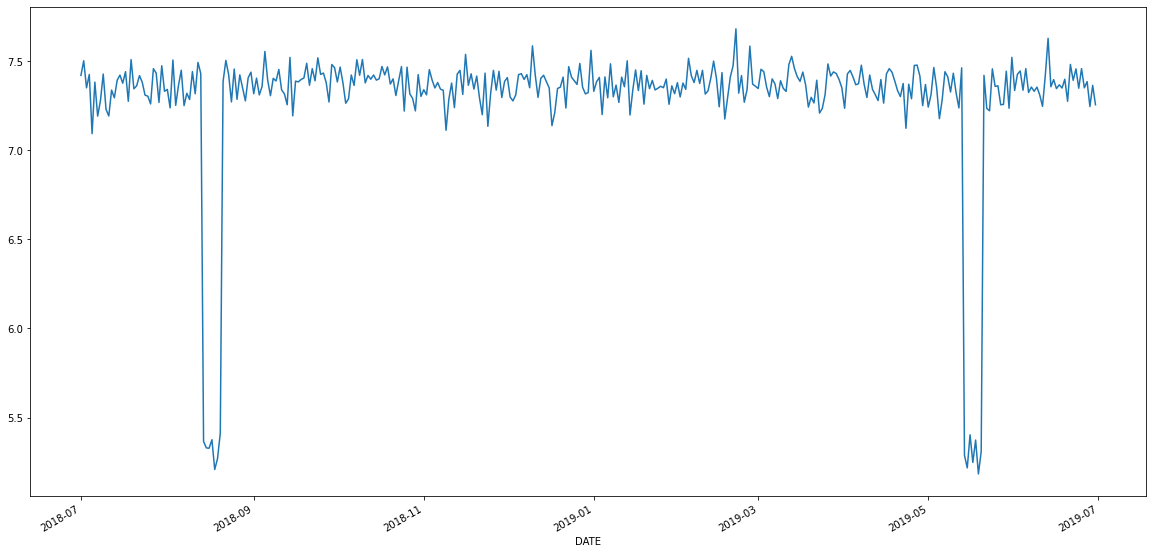

In [37]:
plt.figure(figsize=(20,10))
date_group.plot()
plt.savefig("chip_sales.jpg")

In [38]:
some_df = date_group.reset_index()
some_df.head(3)

,DATE,TOT_SALES
0,2018-07-01,7.420965
1,2018-07-02,7.503077
2,2018-07-03,7.351187


In [39]:
some_df.loc[some_df['DATE'].dt.month==8]

,DATE,TOT_SALES
31,2018-08-01,7.342353
32,2018-08-02,7.238416
33,2018-08-03,7.507251
34,2018-08-04,7.252782
35,2018-08-05,7.364397
36,2018-08-06,7.449858
37,2018-08-07,7.251647
38,2018-08-08,7.320432
39,2018-08-09,7.285736
40,2018-08-10,7.442222


In [40]:
some_df.loc[some_df["DATE"].dt.month==5]

,DATE,TOT_SALES
303,2019-05-01,7.243235
304,2019-05-02,7.311994
305,2019-05-03,7.465449
306,2019-05-04,7.353968
307,2019-05-05,7.178088
308,2019-05-06,7.284300
309,2019-05-07,7.441679
310,2019-05-08,7.413181
311,2019-05-09,7.327695
312,2019-05-10,7.433233


may 14-20 and August 14-20 have ower sales on average compared to other days

#### Graph number of purchases over time

In [41]:
transaction_df.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,natural chip compny seasalt,175,2,6.0
1,2019-05-14,1,1307,348,66,ccs nacho cheese,175,3,6.3
2,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken,170,2,2.9


In [42]:
# group by date and look at count (number of purchases)
purchase_count = transaction_df.sort_values(by='DATE', ascending=True)\
                            .groupby(by='DATE')\
                            .count()['STORE_NBR']

In [43]:
purchase_count

DATE
2018-07-01    663
2018-07-02    650
2018-07-03    674
2018-07-04    669
2018-07-05    660
             ... 
2019-06-26    657
2019-06-27    669
2019-06-28    673
2019-06-29    703
2019-06-30    704
Name: STORE_NBR, Length: 364, dtype: int64

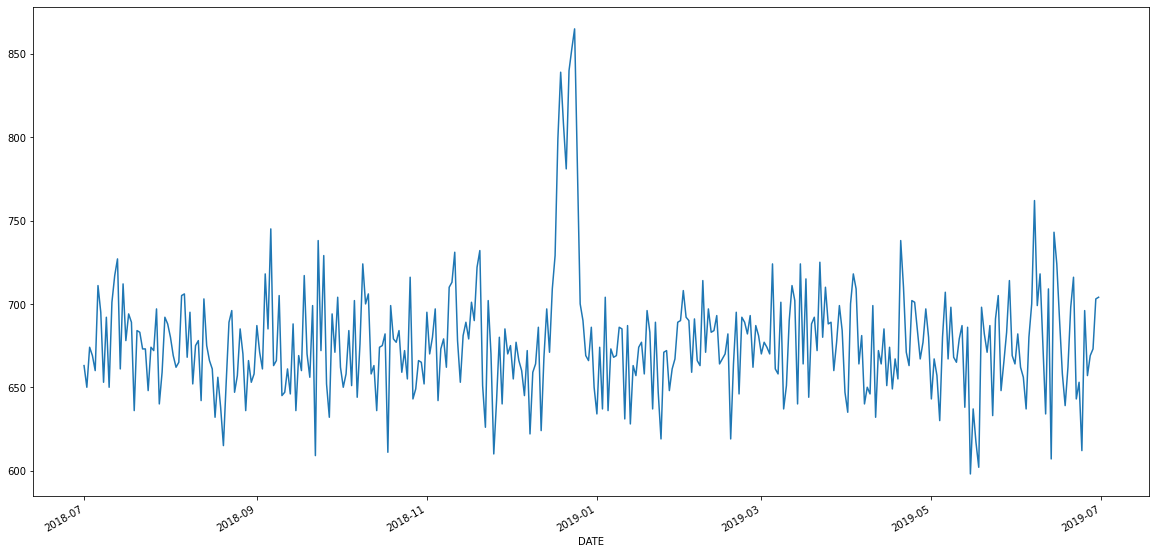

In [44]:
plt.figure(figsize=(20,10))
purchase_count.plot()

(736999.0, 737091.0)

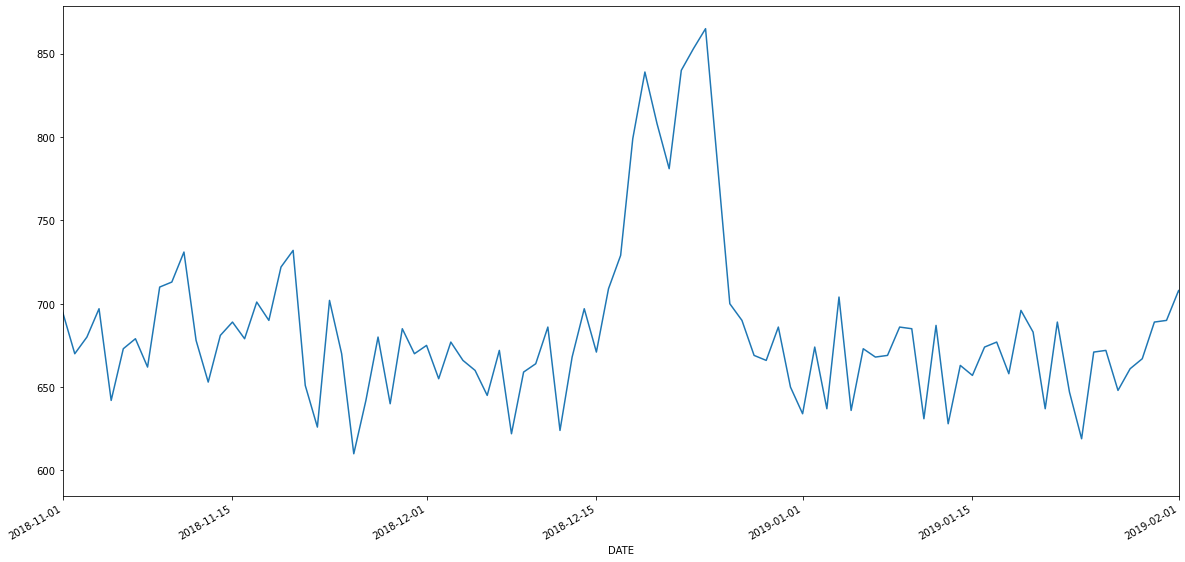

In [45]:
plt.figure(figsize=(20,10))
purchase_count.plot()
plt.xlim(["2018-11-01", "2019-02-01"])

In [46]:
purchase_count_df = pd.DataFrame(purchase_count)

In [47]:
purchase_count_df["2018-12-01":"2019-01-15"]


,STORE_NBR
DATE,
2018-12-01,675
2018-12-02,655
2018-12-03,677
2018-12-04,666
2018-12-05,660
2018-12-06,645
2018-12-07,672
2018-12-08,622
2018-12-09,659


we can see a surge in number of purchases from December 17 to December 24. This surge could be explained by Christmas where customers want to do some last minute shopping or want to shop before the stores close on the 25th.

In [48]:
transaction_df.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,natural chip compny seasalt,175,2,6.0
1,2019-05-14,1,1307,348,66,ccs nacho cheese,175,3,6.3


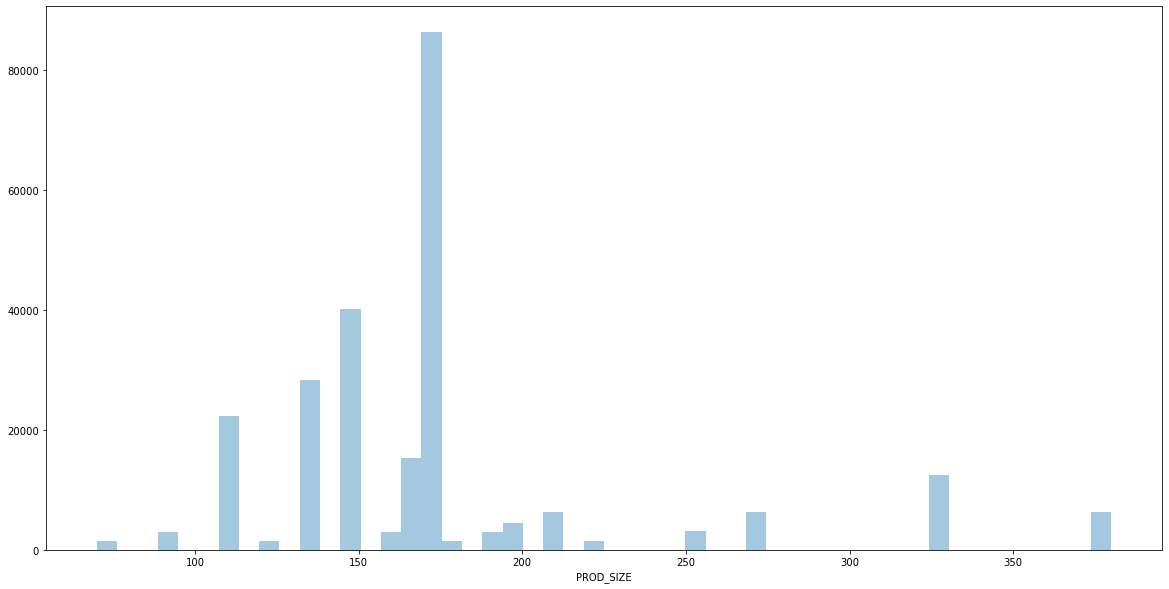

In [49]:
plt.figure(figsize=(20,10))
sns.distplot(transaction_df['PROD_SIZE'],kde=False)

#### Filter out the brands of the chips. 
Brand names are just the first words in PROD_NAME

In [50]:
transaction_df.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,natural chip compny seasalt,175,2,6.0
1,2019-05-14,1,1307,348,66,ccs nacho cheese,175,3,6.3


In [57]:
# forgot to do this earlier when we dropped the rows
transaction_df.reset_index(inplace=True)

In [58]:
brand_names = []
for i in range(transaction_df.shape[0]):
    brand_names.append(transaction_df['PROD_NAME'][i].split()[0])
    

In [60]:
# get the index number of the column:"PROD_NAME"
prod_name_column_loc = transaction_df.columns.get_loc("PROD_NAME")
print(prod_name_column_loc)

transaction_df.insert(prod_name_column_loc + 1, "BRAND_NAME", brand_names)

6


In [62]:
# check if changes are made
transaction_df.head()

,index,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,BRAND_NAME,PROD_SIZE,PROD_QTY,TOT_SALES
0,0,2018-10-17,1,1000,1,5,natural chip compny seasalt,natural,175,2,6.0
1,1,2019-05-14,1,1307,348,66,ccs nacho cheese,ccs,175,3,6.3
2,2,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken,smiths,170,2,2.9
3,3,2018-08-17,2,2373,974,69,smiths chip thinly s/cream&onion,smiths,175,5,15.0
4,4,2018-08-18,2,2426,1038,108,kettle tortilla chpshny&jlpno chili,kettle,150,3,13.8


In [69]:
transaction_df['BRAND_NAME'].unique()

array(['natural', 'ccs', 'smiths', 'kettle', 'grain', 'doritos',
       'twisties', 'ww', 'thins', 'burger', 'ncc', 'cheezels', 'infzns',
       'red', 'pringles', 'dorito', 'infuzions', 'smith', 'grnwves',
       'tyrrells', 'cobs', 'french', 'rrd', 'tostitos', 'cheetos',
       'woolworths', 'snbts', 'sunbites'], dtype=object)

Brand names have inconsistent naming conventions...
* ncc and natural
* smith and smiths
* grain, grnwves and grainwaves
* ww and woolworths
* red, rrd and red rock deli
* 'infzns' and 'infuzions'
* 'snbts' and 'sunbites'
* 'smiths' and 'smith'
* 'doritos' and 'dorito'

In [70]:
# rename brand names for consistency
transaction_df['BRAND_NAME'].replace("ncc", "natural", inplace=True)
transaction_df['BRAND_NAME'].replace("smith", "smiths", inplace=True)
transaction_df['BRAND_NAME'].replace(['grain','grnwves'], "grainwaves", inplace=True)
transaction_df['BRAND_NAME'].replace("ww", "woolworths", inplace=True)
transaction_df['BRAND_NAME'].replace(["red",'rrd'], "red rock deli", inplace=True)
transaction_df['BRAND_NAME'].replace("infzns", "infuzions", inplace=True)
transaction_df['BRAND_NAME'].replace("snbts", "sunbites", inplace=True)
transaction_df['BRAND_NAME'].replace('dorito', "doritos", inplace=True)

C:\Users\smartestpersonalive\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [71]:
# check if changes are made
transaction_df['BRAND_NAME'].unique()

array(['natural', 'ccs', 'smiths', 'kettle', 'grainwaves', 'doritos',
       'twisties', 'woolworths', 'thins', 'burger', 'cheezels',
       'infuzions', 'red rock deli', 'pringles', 'tyrrells', 'cobs',
       'french', 'tostitos', 'cheetos', 'sunbites'], dtype=object)

Check which brand had the most sales and purchases:


In [72]:
transaction_df.head(2)

,index,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,BRAND_NAME,PROD_SIZE,PROD_QTY,TOT_SALES
0,0,2018-10-17,1,1000,1,5,natural chip compny seasalt,natural,175,2,6.0
1,1,2019-05-14,1,1307,348,66,ccs nacho cheese,ccs,175,3,6.3


In [76]:
brand_group = transaction_df.groupby(by='BRAND_NAME')

In [82]:
brand_group.sum().sort_values(by='TOT_SALES', ascending=False)['TOT_SALES']

BRAND_NAME
kettle           387471.2
doritos          225099.3
smiths           216535.9
pringles         176730.5
infuzions         98743.6
thins             88852.5
red rock deli     87607.5
twisties          80828.4
tostitos          79239.6
cobs              70284.8
grainwaves        51491.2
tyrrells          51387.0
natural           42318.0
woolworths        41059.1
cheezels          39591.0
ccs               18078.9
cheetos           16884.5
sunbites           9676.4
french             7929.0
burger             6831.0
Name: TOT_SALES, dtype: float64

In [83]:
brand_group.count().sort_values(by='TOT_SALES',ascending=False)['TOT_SALES']

BRAND_NAME
kettle           41166
smiths           30311
doritos          25163
pringles         25052
red rock deli    16321
infuzions        14185
thins            14075
woolworths       11836
cobs              9678
tostitos          9443
twisties          9420
grainwaves        7733
natural           7469
tyrrells          6428
cheezels          4583
ccs               4551
sunbites          3008
cheetos           2927
burger            1564
french            1418
Name: TOT_SALES, dtype: int64

Kettle have the highest purchases numbers and sales. Smiths have the third highest sales numbers but second highest in purchase counts so their profit margin could be higher than Doritos

## Examine Customer Data


**Lifestage**: Customer attribute that identifies whether a customer has a family or not and what point in life they are at e.g. are their children in pre-school/primary/secondary school.

**Premium_customer:** Customer segmentation used to differentiate shoppers by the price point of products they buy and the types of products they buy. It is used to identify whether customers may spend more for quality or brand or whether they will purchase the cheapest options.

In [84]:
# check for null values
behavior_df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [89]:
# check min max values. format to remove scientific notation
round(behavior_df.describe(),3)

,LYLTY_CARD_NBR
count,72637.000
mean,136185.932
std,89892.932
min,1000.000
25%,66202.000
50%,134040.000
75%,203375.000
max,2373711.000


In [85]:
behavior_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [94]:
# check number of unique values for each feature
behavior_df.nunique()

LYLTY_CARD_NBR      72637
LIFESTAGE               7
PREMIUM_CUSTOMER        3
dtype: int64

In [95]:
# check the different unique values for the lifestage feature
behavior_df['LIFESTAGE'].unique()


array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

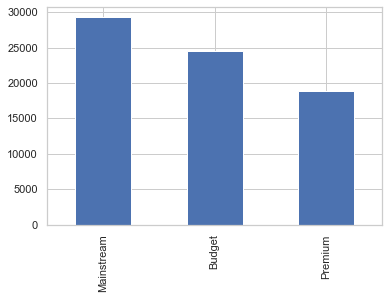

In [100]:
# check premium customer distribution
behavior_df['PREMIUM_CUSTOMER'].value_counts().plot(kind='bar')


In [ ]:

df = sns.load_dataset("tips")
x, y, hue = "day", "proportion", "sex"
hue_order = ["Male", "Female"]

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

In [ ]:
df.head()

In [ ]:
df['day'].groupby(df['sex']).value_counts(normalize=True).plot(kind="bar")

In [ ]:
df[x]\
 .groupby(df[hue])\
 .value_counts(normalize=True)\
 .rename(y)\
 .reset_index()

In [ ]:
df_cfa_outcome.loc[df_cfa_outcome["outcome_type"]